# Rainfall Prediction Project
### Module 13: Project - Rainfall Prediction
This notebook demonstrates how to predict **precipitation (rainfall)** using the Austin weather dataset. We will clean and preprocess the data, apply a linear regression model, evaluate it, and visualize the results.

## 1. Load and Inspect Data
We start by loading the dataset and inspecting its structure.

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('austin_weather.csv')

# Display first few rows and dataset info
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

(         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
 0  2013-12-21         74        60        45            67           49   
 1  2013-12-22         56        48        39            43           36   
 2  2013-12-23         58        45        32            31           27   
 3  2013-12-24         61        46        31            36           28   
 4  2013-12-25         58        50        41            44           40   
 
   DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
 0           43                  93                 75                 57  ...   
 1           28                  93                 68                 43  ...   
 2           23                  76                 52                 27  ...   
 3           21                  89                 56                 22  ...   
 4           36                  86                 71                 56  ...   
 
   SeaLevelPressureAvgInches SeaLevelPressureLow

## 2. Data Cleaning and Preprocessing
- Drop irrelevant columns (`Date`, `Events`)
- Replace special values ('T' = trace → 0, '-' = NaN)
- Drop rows with missing values
- Convert all columns to numeric

In [9]:
import numpy as np

# Drop irrelevant columns
df = df.drop(columns=['Date', 'Events'])

# Replace special values
df.replace('T', '0', inplace=True)
df.replace('-', np.nan, inplace=True)

# Drop rows with NaN values
df = df.dropna()

# Convert all columns to numeric
df = df.apply(pd.to_numeric)

# Verify cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1318
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TempHighF                   1305 non-null   int64  
 1   TempAvgF                    1305 non-null   int64  
 2   TempLowF                    1305 non-null   int64  
 3   DewPointHighF               1305 non-null   int64  
 4   DewPointAvgF                1305 non-null   int64  
 5   DewPointLowF                1305 non-null   int64  
 6   HumidityHighPercent         1305 non-null   int64  
 7   HumidityAvgPercent          1305 non-null   int64  
 8   HumidityLowPercent          1305 non-null   int64  
 9   SeaLevelPressureHighInches  1305 non-null   float64
 10  SeaLevelPressureAvgInches   1305 non-null   float64
 11  SeaLevelPressureLowInches   1305 non-null   float64
 12  VisibilityHighMiles         1305 non-null   int64  
 13  VisibilityAvgMiles          1305 non-n

## 3. Feature Selection
We use all numeric weather features to predict `PrecipitationSumInches`. The target variable is separated from the features.

In [10]:
# Separate features (X) and target (y)
X = df.drop('PrecipitationSumInches', axis=1)
y = df['PrecipitationSumInches']

print('Features:', list(X.columns))
print('Target: PrecipitationSumInches')

Features: ['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH']
Target: PrecipitationSumInches


## 4. Train-Test Split
We split the dataset into training (80%) and testing (20%) sets.

In [11]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training samples:', X_train.shape[0])
print('Testing samples:', X_test.shape[0])

Training samples: 1044
Testing samples: 261


## 5. Train Linear Regression Model
We train a linear regression model using scikit-learn.

In [12]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
coeffs = pd.Series(model.coef_, index=X.columns)
coeffs

Intercept: -1.1737741052619202


TempHighF                     0.030575
TempAvgF                     -0.049819
TempLowF                      0.027453
DewPointHighF                 0.010983
DewPointAvgF                 -0.027941
DewPointLowF                  0.010748
HumidityHighPercent           0.004834
HumidityAvgPercent           -0.013127
HumidityLowPercent            0.014152
SeaLevelPressureHighInches   -0.532466
SeaLevelPressureAvgInches     0.662865
SeaLevelPressureLowInches    -0.186893
VisibilityHighMiles           0.316382
VisibilityAvgMiles           -0.101901
VisibilityLowMiles           -0.005348
WindHighMPH                   0.060240
WindAvgMPH                   -0.048237
WindGustMPH                  -0.007021
dtype: float64

## 6. Model Evaluation
We evaluate the model using **Root Mean Squared Error (RMSE)** and **R² score**.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f} inches')
print(f'R^2: {r2:.3f}')

RMSE: 0.264 inches
R^2: 0.221


## 7. Visualization
We visualize feature correlations, relationships with precipitation, and actual vs predicted precipitation.

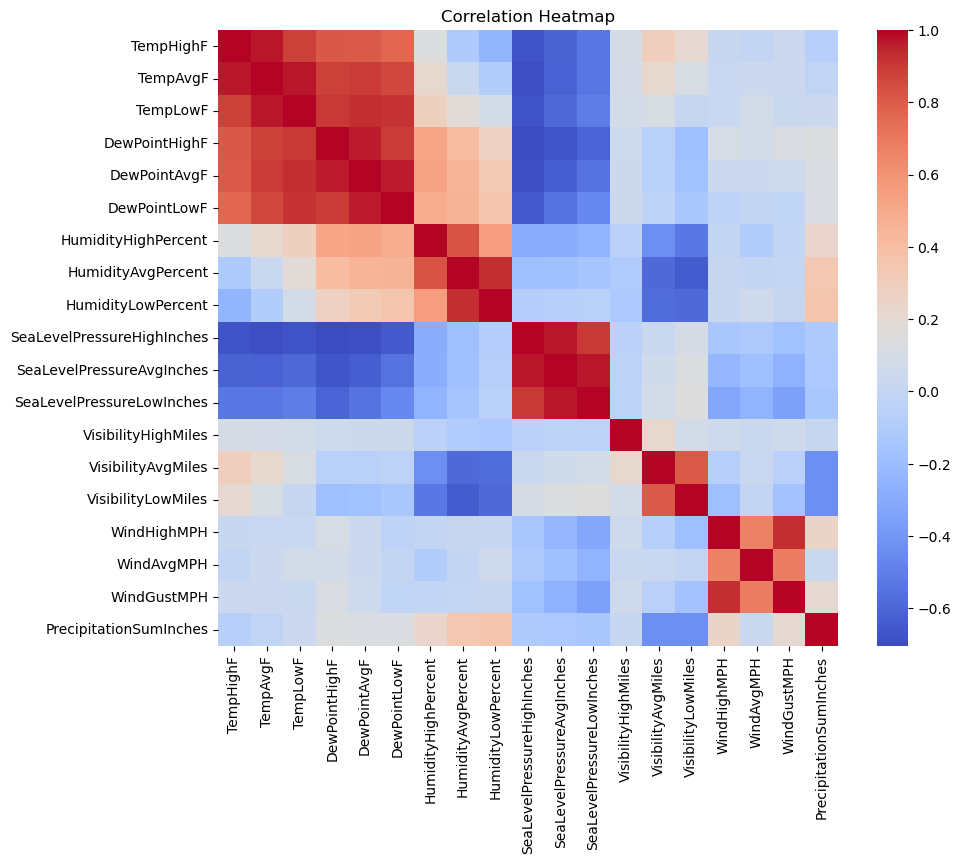

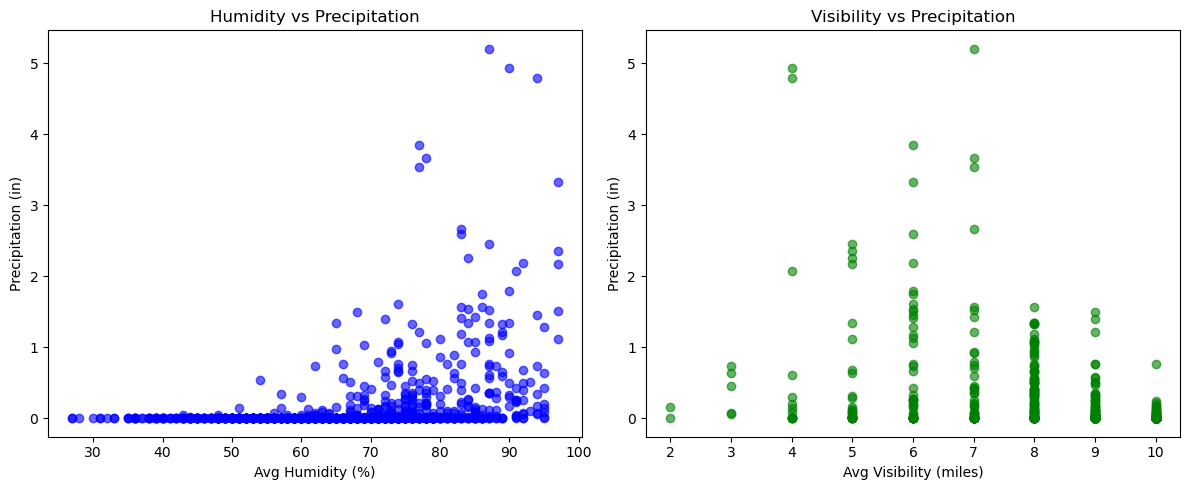

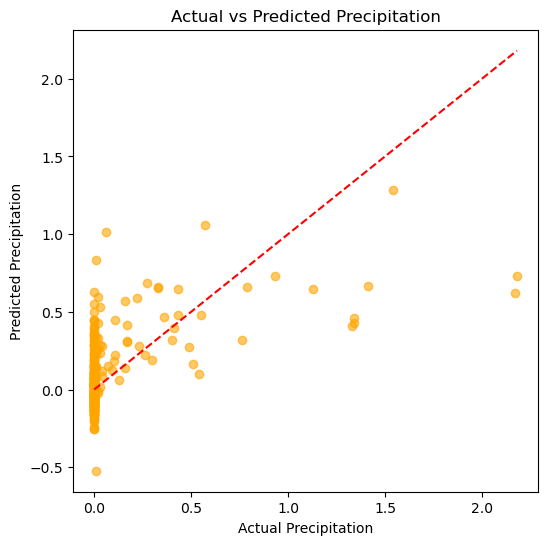

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].scatter(df['HumidityAvgPercent'], df['PrecipitationSumInches'], alpha=0.6, color='blue')
axes[0].set_xlabel('Avg Humidity (%)')
axes[0].set_ylabel('Precipitation (in)')
axes[0].set_title('Humidity vs Precipitation')

axes[1].scatter(df['VisibilityAvgMiles'], df['PrecipitationSumInches'], alpha=0.6, color='green')
axes[1].set_xlabel('Avg Visibility (miles)')
axes[1].set_ylabel('Precipitation (in)')
axes[1].set_title('Visibility vs Precipitation')

plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.show()